# Autoencoding

## One-hot Encoder

In [1]:
from conx import *

Using Theano backend.


In [2]:
size = 5

In [3]:
net = Network("Autoencoder")
net.add(Layer("input", size, minmax=(0,1)))
net.add(Layer("hidden", 5, activation="relu", visible=True))
net.add(Layer("output", size, activation="sigmoid"))
net.config["font_family"] = "monospace"

In [4]:
net.connect()

In [5]:
net.compile(error='binary_crossentropy', optimizer="adam")

<IPython.core.display.Javascript object>

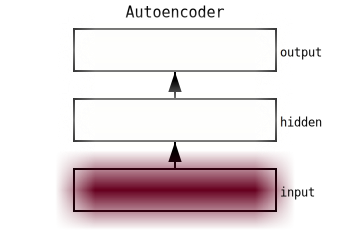

In [6]:
net

In [7]:
patterns = [one_hot(i, size) for i in range(size)]

In [8]:
patterns[0]

[1.0, 0.0, 0.0, 0.0, 0.0]

In [9]:
net.dataset.load([(p,p) for p in patterns])

<IPython.core.display.Javascript object>

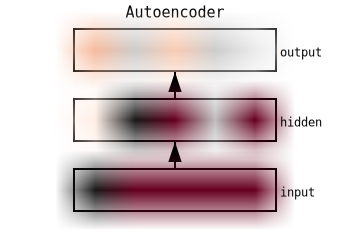

In [10]:
net

In [11]:
import time
for i in range(size):
    net.propagate(net.dataset.inputs[i])
    time.sleep(1)

In [12]:
net.dataset.summary()

Input Summary:
   count  : 5 (5 for training, 0 for testing)
   shape  : (5,)
   range  : (0.0, 1.0)
Target Summary:
   count  : 5 (5 for training, 0 for testing)
   shape  : (5,)
   range  : (0.0, 1.0)


In [13]:
net.train(accuracy=1, epochs=10000, report_rate=200, tolerance=0.4)

Training...
Epoch #  200 | train error 0.53426 | train accuracy 0.72000 | validate% 0.00000
Epoch #  400 | train error 0.38673 | train accuracy 0.92000 | validate% 0.00000
Epoch #  600 | train error 0.27525 | train accuracy 0.96000 | validate% 0.60000
Epoch #  800 | train error 0.19539 | train accuracy 0.92000 | validate% 0.80000
Epoch #  967 | train error 0.14049 | train accuracy 1.00000 | validate% 1.00000


In [14]:
net.propagate(net.dataset.inputs[0])

[0.600296676158905,
 0.2843337059020996,
 0.10659263283014297,
 0.3903748691082001,
 0.10431075841188431]

In [15]:
net.test()

Testing on training dataset...
# | inputs | targets | outputs | result
---------------------------------------
0 | [1.00,0.00,0.00,0.00,0.00] | [1.00,0.00,0.00,0.00,0.00] | [0.60,0.28,0.11,0.39,0.10] | X
1 | [0.00,1.00,0.00,0.00,0.00] | [0.00,1.00,0.00,0.00,0.00] | [0.09,0.78,0.08,0.01,0.01] | X
2 | [0.00,0.00,1.00,0.00,0.00] | [0.00,0.00,1.00,0.00,0.00] | [0.03,0.22,0.83,0.06,0.02] | X
3 | [0.00,0.00,0.00,1.00,0.00] | [0.00,0.00,0.00,1.00,0.00] | [0.06,0.05,0.01,0.75,0.03] | X
4 | [0.00,0.00,0.00,0.00,1.00] | [0.00,0.00,0.00,0.00,1.00] | [0.02,0.10,0.05,0.19,0.89] | X
Total count: 25
Total percentage correct: 0.52


In [16]:
for i in range(size):
    net.propagate(net.dataset.inputs[i])
    time.sleep(1)

## MNIST Autoencoding

In [17]:
from conx import Network, Layer, FlattenLayer

In [18]:
net = Network("MNIST-Autoencoder")

In [19]:
net.add(Layer("input", (28,28,1)))
net.add(FlattenLayer("flatten"))
net.add(Layer("hidden1", 25, activation="relu"))
net.add(Layer("hidden2", 25, activation="relu"))
net.add(Layer("hidden3", 25, activation="relu"))
net.add(Layer("output", (28 * 28 * 1), vshape=(28, 28), activation="sigmoid"))

In [20]:
net.connect()
net.compile(error="binary_crossentropy", optimizer="adam")

In [21]:
net.dataset.get('mnist')
net.dataset.set_targets_from_inputs()
net.dataset.targets.reshape(0, (28 * 28))
net.dataset.summary()

Input Summary:
   count  : 70000 (70000 for training, 0 for testing)
   shape  : (28, 28, 1)
   range  : (0.0, 1.0)
Target Summary:
   count  : 70000 (70000 for training, 0 for testing)
   shape  : (784,)
   range  : (0.0, 1.0)


In [22]:
net.dashboard()

<IPython.core.display.Javascript object>

In [23]:
import numpy as np
image = np.random.rand(784).reshape((28, 28, 1))

In [24]:
output = net.propagate(image)

In [25]:
net.propagate_to("hidden3", image)

[0.0,
 0.0,
 0.0,
 0.25560426712036133,
 0.0,
 0.3456233739852905,
 0.0,
 0.2592473030090332,
 0.0,
 0.0,
 0.0,
 0.0,
 0.09224338829517365,
 0.0,
 0.012687109410762787,
 0.0,
 0.1402377337217331,
 0.0,
 0.0,
 0.21469655632972717,
 0.0,
 0.0,
 0.0,
 0.4209330081939697,
 0.4091458022594452]

In [26]:
net.dataset.slice(100)

In [27]:
net.train(accuracy=0.5, epochs=1000, report_rate=100, tolerance=.4)

Training...
Epoch #  100 | train error 0.24617 | train accuracy 0.79756 | validate% 0.00000
Epoch #  200 | train error 0.21829 | train accuracy 0.80041 | validate% 0.00000
Epoch #  300 | train error 0.19434 | train accuracy 0.80427 | validate% 0.00000
Epoch #  400 | train error 0.15210 | train accuracy 0.80846 | validate% 0.00000
Epoch #  500 | train error 0.13616 | train accuracy 0.81059 | validate% 0.00000
Epoch #  600 | train error 0.12340 | train accuracy 0.81217 | validate% 0.00000
Epoch #  700 | train error 0.11337 | train accuracy 0.81365 | validate% 0.03000
Epoch #  800 | train error 0.10619 | train accuracy 0.81510 | validate% 0.03000
Epoch #  900 | train error 0.10088 | train accuracy 0.81589 | validate% 0.04000
Epoch # 1000 | train error 0.09680 | train accuracy 0.81661 | validate% 0.07000
Epoch # 1000 | train error 0.09680 | train accuracy 0.81661 | validate% 0.07000


In [28]:
for i in range(20):
    net.propagate(net.dataset.inputs[i])

In [29]:
net.test()

Testing on training dataset...
# | inputs | targets | outputs | result
---------------------------------------
0 | [[[0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00]], [[0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00]], [[0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00]], [[0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],